In [ ]:
## Clean the data in R

```r
library(qiime2R)
library(tidyverse)

merge_with_id <- function(otu_table, taxonomy, level) {
    # Merge an otu table with a taxonomy table, keeping only identified taxa
    known <- lapply(1:nrow(taxonomy), known_taxon,
        taxonomy = taxonomy,
        level = level
    ) %>%
        unlist() %>%
        data.frame(row.names = rownames(taxonomy), taxon = .) %>%
        merge(., otu_table, by = 0)
    return(subset(known, select = -c(Row.names)))
}

rel_abund <- function(abs_abund, first_col) {
    rel_abund <- data.frame(first_col = abs_abund[1])
    for (col in 2:ncol(abs_abund)) {
        rel_abund[colnames(abs_abund[col])] <- abs_abund[col] / sum(abs_abund[col])
    }
    return(rel_abund)
}

all <- read_qza("./results/2-OTUs/Merged-otuFreqs.qza")$data
sk_merged <- read_qza("./results/3-Classified/Merged-Sklearn.qza")$data %>%
    parse_taxonomy()

orders <- merge_with_id(all, sk_merged, level = 2) %>%
    filter(!(is.na(taxon))) %>%
    group_by(taxon) %>%
    summarise(across(everything(), sum))

to_log <- orders %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    rename_with(~ as.character(as.vector(orders$taxon)), all_of(colnames(.))) %>%
    mutate(ids = rownames(.)) %>%
     filter(!(ids == "taxon"))  %>%
    inner_join(metadata, ., by = join_by(x$sample.id == y$ids)) %>%
    as_tibble()
write.csv(to_log, "logistic_reg.csv", row.names = FALSE)
```

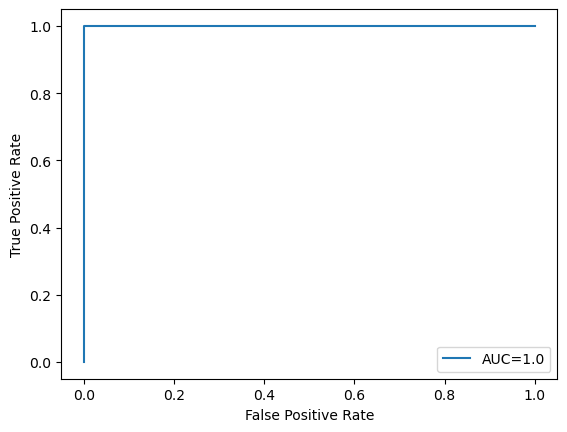

,Acidobacteriota,Actinobacteriota,Altiarchaeota,Armatimonadota,Arthropoda,Ascomycota,Asgardarchaeota,Bacteroidota,Basidiomycota,Bdellovibrionota,...,Patescibacteria,Phragmoplastophyta,Planctomycetota,Proteobacteria,Spirochaetota,Sumerlaeota,Synergistota,Thermoplasmatota,Verrucomicrobiota,Zixibacteria
0,0.080066,0.057271,0.0,0.002324,0.0,0.0,0.0,0.317729,0.0,0.001043,...,0.005691,0.0,0.015286,0.097855,0.001996,0.000000,0.001311,0.000447,0.106615,0.0
1,0.122859,0.035415,0.0,0.002419,0.0,0.0,0.0,0.272523,0.0,0.001641,...,0.007572,0.0,0.010999,0.136765,0.004578,0.000000,0.000921,0.000000,0.153983,0.0
2,0.079846,0.055593,0.0,0.003575,0.0,0.0,0.0,0.316302,0.0,0.000524,...,0.006564,0.0,0.015069,0.093066,0.001726,0.000247,0.001479,0.000308,0.105886,0.0
3,0.125430,0.035272,0.0,0.002007,0.0,0.0,0.0,0.273457,0.0,0.001864,...,0.007599,0.0,0.011384,0.132370,0.004244,0.000143,0.000430,0.000000,0.158437,0.0
4,0.161192,0.080300,0.0,0.003842,0.0,0.0,0.0,0.187541,0.0,0.001185,...,0.002538,0.0,0.023540,0.258398,0.002014,0.000694,0.000254,0.000237,0.095564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.226209,0.065637,0.0,0.000000,0.0,0.0,0.0,0.029752,0.0,0.002725,...,0.000000,0.0,0.046559,0.163752,0.003634,0.000000,0.000000,0.000000,0.144901,0.0
126,0.220727,0.071557,0.0,0.000000,0.0,0.0,0.0,0.025348,0.0,0.002916,...,0.000000,0.0,0.050247,0.175864,0.003365,0.000000,0.000000,0.000000,0.160162,0.0
127,0.248599,0.070164,0.0,0.000000,0.0,0.0,0.0,0.026003,0.0,0.001569,...,0.000000,0.0,0.049540,0.158485,0.001569,0.000000,0.000000,0.000000,0.153553,0.0
128,0.221677,0.071588,0.0,0.000000,0.0,0.0,0.0,0.025870,0.0,0.000000,...,0.000000,0.0,0.048171,0.179081,0.002899,0.000000,0.000000,0.000000,0.148305,0.0


,Acidobacteriota,Actinobacteriota,Altiarchaeota,Armatimonadota,Arthropoda,Ascomycota,Asgardarchaeota,Bacteroidota,Basidiomycota,Bdellovibrionota,...,Patescibacteria,Phragmoplastophyta,Planctomycetota,Proteobacteria,Spirochaetota,Sumerlaeota,Synergistota,Thermoplasmatota,Verrucomicrobiota,Zixibacteria
121,0.220618,0.062937,0.0,0.000000,0.000000,0.0,0.0,0.027521,0.0,0.000000,...,0.000000,0.0,0.054365,0.177081,0.003609,0.000000,0.0,0.000000,0.149335,0.0
68,0.000000,0.010514,0.0,0.000000,0.000000,0.0,0.0,0.006726,0.0,0.000232,...,0.000000,0.0,0.000541,0.017163,0.000000,0.000000,0.0,0.000000,0.002551,0.0
66,0.000234,0.008487,0.0,0.000234,0.000000,0.0,0.0,0.006541,0.0,0.000000,...,0.000000,0.0,0.000000,0.020478,0.000000,0.000000,0.0,0.000000,0.003115,0.0
16,0.041972,0.088248,0.0,0.001350,0.000000,0.0,0.0,0.283915,0.0,0.002615,...,0.008184,0.0,0.013330,0.135177,0.000000,0.000000,0.0,0.000253,0.048131,0.0
62,0.000000,0.007600,0.0,0.000000,0.000000,0.0,0.0,0.008996,0.0,0.000000,...,0.000000,0.0,0.000543,0.020628,0.000000,0.000000,0.0,0.000000,0.002249,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.227110,0.061188,0.0,0.000000,0.000000,0.0,0.0,0.025458,0.0,0.002010,...,0.000000,0.0,0.044886,0.167039,0.004020,0.000000,0.0,0.000000,0.147164,0.0
67,0.000392,0.008787,0.0,0.000235,0.000000,0.0,0.0,0.006747,0.0,0.000000,...,0.000000,0.0,0.000549,0.022752,0.000000,0.000314,0.0,0.000000,0.001726,0.0
64,0.000000,0.008101,0.0,0.000000,0.000000,0.0,0.0,0.005297,0.0,0.000000,...,0.000000,0.0,0.000389,0.023680,0.000000,0.000000,0.0,0.000000,0.002181,0.0
117,0.064134,0.163674,0.0,0.006764,0.000000,0.0,0.0,0.082756,0.0,0.000668,...,0.000000,0.0,0.000000,0.509478,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("./logistic_reg.csv").drop("sample.id", axis="columns")
locations = pd.get_dummies(data["Location"])
y = locations["Newzealand soil"]
X = data.iloc[:, 3:]
#split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# #instantiate the model
lr = LogisticRegression()

# #fit the model using the training data
_ = lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# create ROC curve
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
display(X)